In [81]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import RandomOverSampler   
# from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [23]:
df=pd.read_excel("Election_Data_endsem_project.xlsx")

In [24]:
df.shape

(1525, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [27]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


EDA

In [64]:
#Correlation Matrix
corr_matrix=df.corr()
print(corr_matrix["vote"].sort_values(ascending=False))

vote                       1.000000
Hague                      0.468508
Europe                     0.385443
age                        0.112821
political.knowledge        0.108653
gender                     0.037191
economic.cond.household   -0.174726
economic.cond.national    -0.300737
Blair                     -0.427084
Name: vote, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap')

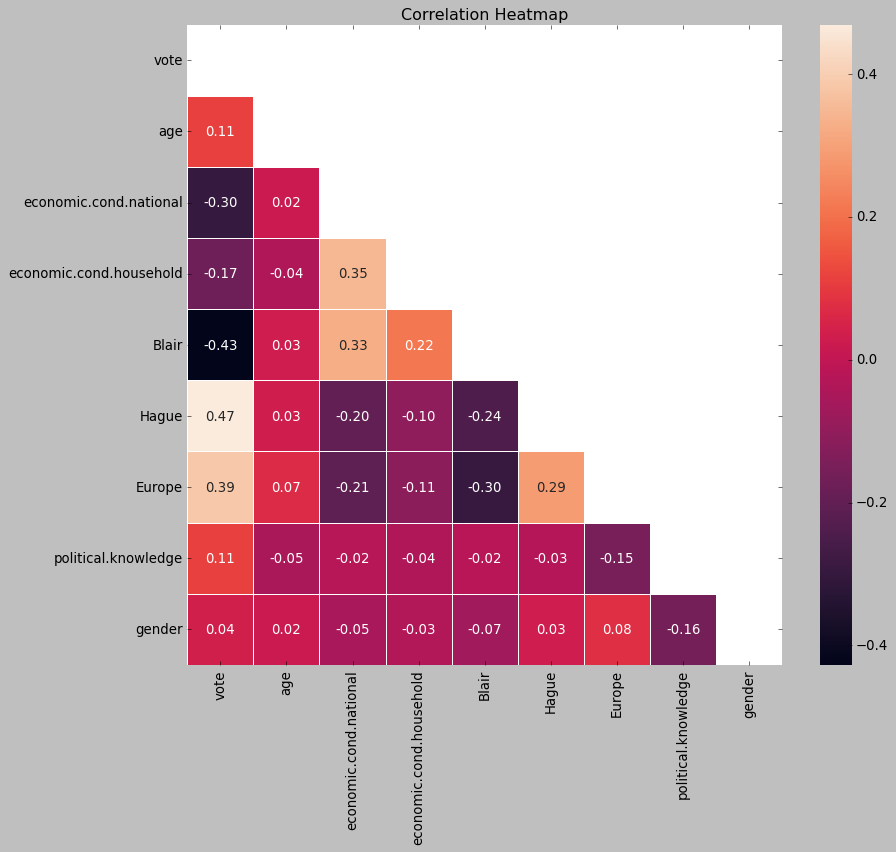

In [65]:
#Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True,  fmt=".2f", linewidths=0.5,mask=np.triu(corr_matrix))
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Vote vs Blair')

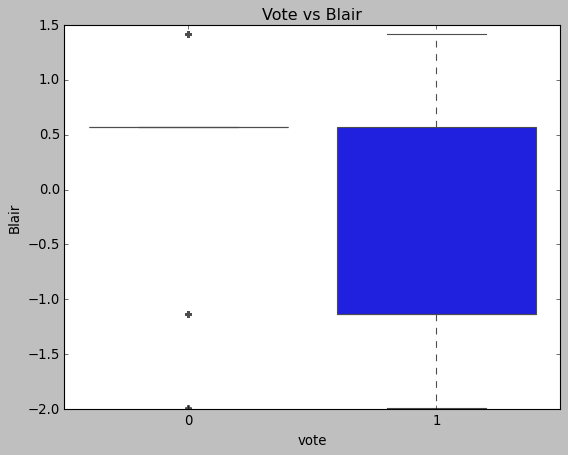

In [66]:
sns.boxplot(x="vote", y="Blair",data=df)
plt.title("Vote vs Blair")

Data Imbalance

In [68]:
df["vote"].value_counts()

vote
0    1063
1     462
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Distribution of Vote')

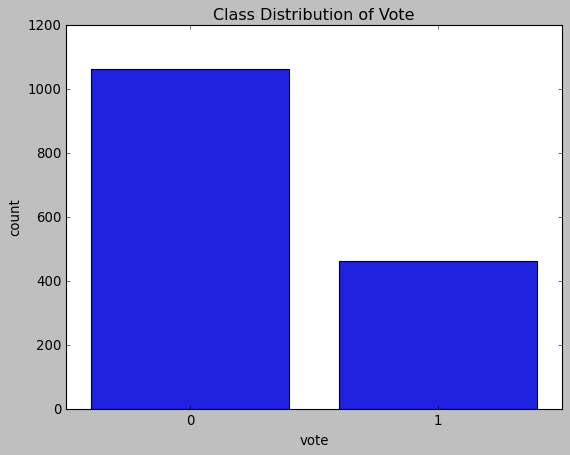

In [67]:
sns.countplot(x=df["vote"])
plt.title("Class Distribution of Vote")

Data Preprocessing

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [29]:
#Removing Redundant Column
df.drop(columns="Unnamed: 0",inplace=True) #since the column contains row number which is not at all useful.

In [30]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

Encoding

In [31]:
df["vote"]=df["vote"].map({"Labour":0,"Conservative":1})


In [32]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,female
1,0,36,4,4,4,4,5,2,male
2,0,35,4,4,5,2,3,2,male
3,0,24,4,2,2,1,4,0,female
4,0,41,2,2,1,1,6,2,male


In [33]:
df["gender"]=df["gender"].map({"male":0, "female":1})

In [34]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,1
1,0,36,4,4,4,4,5,2,0
2,0,35,4,4,5,2,3,2,0
3,0,24,4,2,2,1,4,0,1
4,0,41,2,2,1,1,6,2,0


Feature Scaling

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int64
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int64
dtypes: int64(9)
memory usage: 107.4 KB


In [40]:
# numerical columns
num=["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]
#categorical columns
cat=["vote","gender"]

In [41]:
scaler=StandardScaler()
df[num]=scaler.fit_transform(df[num])

In [42]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,1
1,0,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,0
2,0,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,0
3,0,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,1
4,0,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,0


Handling Data Imbalance

In [73]:
#SMOTE
smote=SMOTE(random_state=42)
X_resamp,y_resamp=smote.fit_resample(df.drop("vote",axis=1),df["vote"])

In [78]:
print(Counter(y_resamp))

Counter({0: 1063, 1: 1063})


In [80]:
X_train,X_test,y_train,y_test=train_test_split(X_resamp,y_resamp,test_size=0.2,random_state=42,stratify=y_resamp)